# VO Simple Cone Search Tutorial

This tutorial requires `astroquery` 0.3.5 or greater. Cone Search allows you to query a catalog of astronomical sources and obtain those that lie within a cone of a given radius around the given position. For more information on Cone Search, see http://astroquery.readthedocs.io/en/latest/vo_conesearch/vo_conesearch.html.

In [1]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

It might be useful to list the available Cone Search catalogs first. By default, catalogs that pass nightly validation are included. Validation is hosted by Space Telescope Science Institute (STScI).

In [2]:
conesearch.list_catalogs()

 [Done]


['SDSS DR7 - Sloan Digital Sky Survey Data Release 7 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 2',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 3',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 4',
 'SDSS DR8 - Sloan Digital Sky Survey Data Release 8 2',
 'The HST Guide Star Catalog, Version 1.1 (Lasker+ 1992) 1',
 'The HST Guide Star Catalog, Version 1.2 (Lasker+ 1996) 1',
 'The HST Guide Star Catalog, Version GSC-ACT (Lasker+ 1996-99) 1',
 'The USNO-A2.0 Catalogue (Monet+ 1998) 1',
 'Two Micron All Sky Survey (2MASS) 1',
 'Two Micron All Sky Survey (2MASS) 2',
 'USNO-A2 Catalogue 1']

Next, let's pick an astronomical object of interest. For example, M31.

In [3]:
c = coord.SkyCoord.from_name('M31', frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.6847083, 41.26875)>


By default, a basic Cone Search goes through the list of catalogs and *stops* at the first one that returns non-empty VO table. Let's search for objects within 0.1 degree around M31. You will see a lot of warnings that were generated by VO table parser but ignored by Cone Search service validator. VO compliance enforced by Cone Search providers is beyond the control of `astroquery.vo_conesearch` package.

In [4]:
result = conesearch.conesearch(c, 0.1 * u.degree)

Trying http://wfaudata.roe.ac.uk/sdssdr7-dsa/DirectCone?DSACAT=SDSS_DR7&DSATAB=Galaxy&


Trying http://wfaudata.roe.ac.uk/sdssdr7-dsa/DirectCone?DSACAT=SDSS_DR7&DSATAB=Star&


Trying http://wfaudata.roe.ac.uk/sdssdr7-dsa/DirectCone?DSACAT=SDSS_DR7&DSATAB=PhotoObjAll&


Trying http://wfaudata.roe.ac.uk/sdssdr7-dsa/DirectCone?DSACAT=SDSS_DR7&DSATAB=PhotoObj&


Trying http://wfaudata.roe.ac.uk/sdssdr8-dsa/DirectCone?DSACAT=SDSS_DR8&DSATAB=SpecObjAll&


Trying http://vizier.u-strasbg.fr/viz-bin/conesearch/I/220/out?


In [5]:
print('First non-empty table returned by', result.url)
print('Number of rows is', result.nrows)

First non-empty table returned by http://vizier.u-strasbg.fr/viz-bin/conesearch/I/220/out?
Number of rows is 5


This VO table can be converted into [Astropy table](http://astropy.readthedocs.io/en/stable/table/index.html) and then manipulated as such; e.g., re-write the table into LaTeX format.

In [6]:
result_tab = Table.read(result, format='votable')
print(result_tab)

   _r       GSC      RAJ2000   DEJ2000  PosErr ... Plate  Epoch   Mult Versions
  deg                  deg       deg     arcs  ...          yr                 
-------- ---------- --------- --------- ------ ... ----- -------- ---- --------
0.096170 0280102081  10.80558  41.23727    0.2 ...  0738 1985.877    F  GSC-all
0.063449 0280102008  10.71207  41.20873    0.2 ...  0738 1985.877    F  GSC-all
0.043453 0280102015  10.68782  41.22536    0.2 ...  0738 1985.877    F  GSC-all
0.066633 0280102017  10.60025  41.24853    0.2 ...  0738 1985.877    F  GSC-all
0.082097 0280502180  10.64539  41.34535    0.2 ...  0738 1985.877    F  GSC-all


In [7]:
result_tab.write('my_result.tex', format='ascii.latex')

In [8]:
# Now use your favorite text editor to open the my_result.tex file.
# For example:
!cat my_result.tex

\begin{table}
\begin{tabular}{ccccccccccccc}
_r & GSC & RAJ2000 & DEJ2000 & PosErr & Pmag & e_Pmag & n_Pmag & Class & Plate & Epoch & Mult & Versions \\
$\mathrm{deg}$ &  & $\mathrm{deg}$ & $\mathrm{deg}$ & $\mathrm{arcs}$ & $\mathrm{mag}$ & $\mathrm{mag}$ &  &  &  & $\mathrm{yr}$ &  &  \\
0.096170 & 0280102081 & 10.80558 & 41.23727 & 0.2 & 13.44 & 0.46 & 1 & 0 & 0738 & 1985.877 & F & GSC-all \\
0.063449 & 0280102008 & 10.71207 & 41.20873 & 0.2 & 11.82 & 0.43 & 1 & 0 & 0738 & 1985.877 & F & GSC-all \\
0.043453 & 0280102015 & 10.68782 & 41.22536 & 0.2 & 13.10 & 0.44 & 1 & 3 & 0738 & 1985.877 & F & GSC-all \\
0.066633 & 0280102017 & 10.60025 & 41.24853 & 0.2 & 13.47 & 0.46 & 1 & 3 & 0738 & 1985.877 & F & GSC-all \\
0.082097 & 0280502180 & 10.64539 & 41.34535 & 0.2 & 12.68 & 0.44 & 1 & 0 & 0738 & 1985.877 & F & GSC-all \\
\end{tabular}
\end{table}


Cone Search results can also be used in conjuction with other types of queries.
For example, you can query SIMBAD for the first entry in your result above.

In [9]:
# Due to the unpredictability of external services,
# The first successful query result (above) might differ
# from run to run.
#
# CHANGE THESE VALUES to the appropriate RA and DEC
# column names you see above, if necessary.
ra_colname = 'RAJ2000'
dec_colname = 'DEJ2000'

In [10]:
# Don't run this cell if column names above are invalid.
if ra_colname in result_tab.colnames and dec_colname in result_tab.colnames:
    row = result_tab[0]
    simbad_obj = coord.SkyCoord(ra=row[ra_colname]*u.deg, dec=row[dec_colname]*u.deg)
    print('Searching SIMBAD for\n{}\n'.format(simbad_obj))
    simbad_result = Simbad.query_region(simbad_obj, radius=5*u.arcsec)
    print(simbad_result)
else:
    print('{} or {} not in search results. Choose from: {}'.format(
        ra_colname, dec_colname, ' '.join(result_tab.colnames)))

Searching SIMBAD for
<SkyCoord (ICRS): (ra, dec) in deg
    (10.80558, 41.23727)>



        MAIN_ID              RA      ... COO_WAVELENGTH     COO_BIBCODE    
                          "h:m:s"    ...                                   
----------------------- ------------ ... -------------- -------------------
2MASS J00431336+4114139 00 43 13.369 ...              N 2003yCat.2246....0C
          [WSB85] S4  1  00 43 13.33 ...              O 1985ApJ...290..140W


Now back to Cone Search... You can extract metadata of this Cone Search catalog.

In [11]:
my_db = vos_catalog.get_remote_catalog_db(conf.conesearch_dbname)
my_cat = my_db.get_catalog_by_url(result.url)
print(my_cat.dumps())

{
    "cap_description": "Cone search capability for table I/220/out (The Full Catalogue (25258765 positions))",
    "cap_index": 4,
    "cap_type": "conesearch",
    "content_level": "research",
    "content_type": "catalog",
    "created": "3/28/2008 4:35:14 PM",
    "creator_seq": "",
    "duplicatesIgnored": 0,
    "intf_index": 1,
    "intf_role": "std",
    "intf_type": "vs:paramhttp",
    "ivoid": "ivo://cds.vizier/i/220",
    "query_type": "",
    "reference_url": "http://cdsarc.u-strasbg.fr/cgi-bin/Cat?I/220",
    "region_of_regard": NaN,
    "res_description": "The original version of this catalog, GSC 1.0, is described in a series of papers: Lasker et al. (1990); Russell et al. (1990); and Jenkner et al. (1990); hereafter referred to as Papers I, II, and III. Additions and corrections made in GSC 1.1 address: incompleteness, misnomers, artifacts, and other errors due to the overexposure of the brighter stars on the Schmidt plates, the identification of blends likely to have 

If you have a favorite catalog in mind, you can also perform Cone Search only on that catalog. A list of available catalogs can be obtained by calling `conesearch.list_catalogs()`, as mentioned above.

In [12]:
result = conesearch.conesearch(
    c, 0.1 * u.degree, catalog_db='The USNO-A2.0 Catalogue (Monet+ 1998) 1')

Trying http://vizier.u-strasbg.fr/viz-bin/conesearch/I/252/out?


In [13]:
print('Number of rows is', result.nrows)

Number of rows is 3


Let's explore the 3 rows of astronomical objects found within 0.1 degree of M31 in the given catalog and sort them by increasing distance. For this example, the VO table has several columns that might include:

* `_r` = Angular distance (in degrees) between object and M31
* `USNO-A2.0` = Catalog ID of the object
* `RAJ2000` = Right ascension of the object (epoch=J2000)
* `DEJ2000` = Declination of the object (epoch=J2000)

Note that column names, meanings, order, etc. might vary from catalog to catalog.

In [14]:
data_array = result.array.data
print(data_array)

[(0.06328 , b'1275-00429939', 10.712834, 41.209109, b'A', b'', 99.9, 11.2,    0.   )
 (0.094265, b'1275-00425574', 10.595878, 41.335328, b'', b'', 19.8, 17.4, 1953.773)
 (0.09804 , b'1275-00427192', 10.639945, 41.360845, b'', b'', 19.4, 18.4, 1953.773)]


In [15]:
col_names = data_array.dtype.names
print(col_names)

('_r', 'USNO-A2.0', 'RAJ2000', 'DEJ2000', 'ACTflag', 'Mflag', 'Bmag', 'Rmag', 'Epoch')


In [16]:
distance = data_array['_r']
sorted_indices = np.argsort(distance)
sorted_data_array = data_array[sorted_indices]
print(sorted_data_array)

[(0.06328 , b'1275-00429939', 10.712834, 41.209109, b'A', b'', 99.9, 11.2,    0.   )
 (0.094265, b'1275-00425574', 10.595878, 41.335328, b'', b'', 19.8, 17.4, 1953.773)
 (0.09804 , b'1275-00427192', 10.639945, 41.360845, b'', b'', 19.4, 18.4, 1953.773)]


You can also convert the distance to arcseconds.

In [17]:
distance_field = result.get_field_by_id('_r')
print('Field title:', distance_field.title)
print('Unit is', distance_field.unit)

Field title: Distance from center (010.684708+41.268750)[FK5/J2000], at Epoch of catalog (Epoch)
Unit is deg


In [18]:
sorted_distance = distance[sorted_indices]
distance_arcsec = (sorted_distance * distance_field.unit).to(u.arcsec)
for d_deg, d_arcsec in zip(sorted_distance, distance_arcsec):
    print('{:.6f} deg converted to {:.4f}'.format(d_deg, d_arcsec))

0.063280 deg converted to 227.8080 arcsec
0.094265 deg converted to 339.3540 arcsec
0.098040 deg converted to 352.9440 arcsec


What if you want *all* the results from *all* the catalogs? And you also want to suppress all the VO table warnings and informational messages?

__Warning: This can be time and resource intensive.__

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    all_results = conesearch.search_all(c, 0.1 * u.degree, verbose=False)

In [20]:
for url, tab in all_results.items():
    print(url, 'returned', tab.nrows, 'rows')

http://vizier.u-strasbg.fr/viz-bin/conesearch/I/220/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/254/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/255/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/252/out? returned 3 rows
http://wfaudata.roe.ac.uk/twomass-dsa/DirectCone?DSACAT=TWOMASS&DSATAB=twomass_psc& returned 2008 rows
http://wfaudata.roe.ac.uk/twomass-dsa/DirectCone?DSACAT=TWOMASS&DSATAB=twomass_xsc& returned 25 rows
http://www.nofs.navy.mil/cgi-bin/vo_cone.cgi?CAT=USNO-A2& returned 3 rows


In [21]:
my_favorite_result = all_results['http://vizier.u-strasbg.fr/viz-bin/conesearch/I/220/out?']
print(my_favorite_result.array.data.dtype.names)
print(my_favorite_result.array.data)

('_r', 'GSC', 'RAJ2000', 'DEJ2000', 'PosErr', 'Pmag', 'e_Pmag', 'n_Pmag', 'Class', 'Plate', 'Epoch', 'Mult', 'Versions')
[(0.09617 , b'0280102081', 10.80558, 41.23727, 0.2, 13.44, 0.46, 1, 0, b'0738', 1985.877, b'F', b'GSC-all')
 (0.063449, b'0280102008', 10.71207, 41.20873, 0.2, 11.82, 0.43, 1, 0, b'0738', 1985.877, b'F', b'GSC-all')
 (0.043453, b'0280102015', 10.68782, 41.22536, 0.2, 13.1 , 0.44, 1, 3, b'0738', 1985.877, b'F', b'GSC-all')
 (0.066633, b'0280102017', 10.60025, 41.24853, 0.2, 13.47, 0.46, 1, 3, b'0738', 1985.877, b'F', b'GSC-all')
 (0.082097, b'0280502180', 10.64539, 41.34535, 0.2, 12.68, 0.44, 1, 0, b'0738', 1985.877, b'F', b'GSC-all')]


### Asynchronous Searches

Asynchronous versions (i.e., search will run in the background) of `conesearch()` and `search_all()` are also available. Result can be obtained using the asynchronous instance's `get()` method that returns the result upon completion or after a given `timeout` value in seconds.

In [22]:
async_search = conesearch.AsyncConeSearch(
    c, 0.1 * u.degree, catalog_db='The USNO-A2.0 Catalogue (Monet+ 1998) 1')
print('Am I running?', async_search.running())

time.sleep(3)
print('After 3 seconds. Am I done?', async_search.done())
print()

result = async_search.get(timeout=30)
print('Number of rows returned is', result.nrows)

Am I running? True


After 3 seconds. Am I done? True

Number of rows returned is 3


In [23]:
async_search_all = conesearch.AsyncSearchAll(c, 0.1 * u.degree)
print('Am I running?', async_search_all.running())
print('Am I done?', async_search_all.done())
print()

all_results = async_search_all.get(timeout=30)
for url, tab in all_results.items():
    print(url, 'returned', tab.nrows, 'rows')

Am I running? True
Am I done? False



http://vizier.u-strasbg.fr/viz-bin/conesearch/I/220/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/254/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/255/out? returned 5 rows
http://vizier.u-strasbg.fr/viz-bin/conesearch/I/252/out? returned 3 rows
http://wfaudata.roe.ac.uk/twomass-dsa/DirectCone?DSACAT=TWOMASS&DSATAB=twomass_psc& returned 2008 rows
http://wfaudata.roe.ac.uk/twomass-dsa/DirectCone?DSACAT=TWOMASS&DSATAB=twomass_xsc& returned 25 rows
http://www.nofs.navy.mil/cgi-bin/vo_cone.cgi?CAT=USNO-A2& returned 3 rows


### Estimating the Search Time

Let's predict the run time of performing Cone Search on `http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&` with a radius of 0.1 degrees. For now, the prediction assumes a very simple linear model, which might or might not reflect the actual trend.

This might take a while.

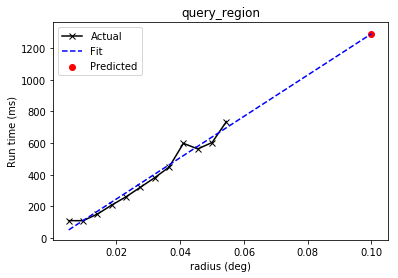

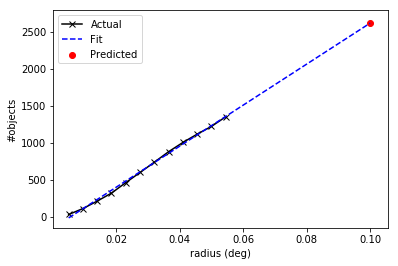

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    t_est, n_est = conesearch.predict_search(
        'http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&',
        c, 0.1 * u.degree, verbose=False, plot=True)

In [25]:
print('Predicted run time is', t_est, 'seconds')
print('Predicted number of rows is', n_est)

Predicted run time is 1.290143085433794 seconds
Predicted number of rows is 2617


Let's get the actual run time and number of rows to compare with the prediction above. This might take a while.

As you will see, the prediction is not spot on, but it is not too shabby (at least, not when I tried it). Note that both predicted and actual run time results also depend on network latency and responsiveness of the service provider.

In [26]:
t_real, tab = conesearch.conesearch_timer(
    c, 0.1 * u.degree,
    catalog_db='http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&',
    verbose=False)

INFO: conesearch_timer took 1.9035687446594238 s on AVERAGE for 1 call(s). [astropy.utils.timer]


In [27]:
print('Actual run time is', t_real, 'seconds')
print('Actual number of rows is', tab.nrows)

Actual run time is 1.9035687446594238 seconds
Actual number of rows is 4028
